In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [3]:
train_df = pd.read_csv(r"/kaggle/input/multiple-disease-prediction/Blood_samples_dataset_balanced_2(f).csv")
test_df = pd.read_csv(r"/kaggle/input/multiple-disease-prediction/blood_samples_dataset_test.csv")

In [4]:
data = pd.concat([train_df , test_df ] ,ignore_index=True)

In [5]:
data.head()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
0,0.739597,0.650198,0.713631,0.868491,0.687433,0.529895,0.290006,0.631045,0.001328,0.795829,...,0.502665,0.215560,0.512941,0.064187,0.610827,0.939485,0.095512,0.465957,0.769230,Healthy
1,0.121786,0.023058,0.944893,0.905372,0.507711,0.403033,0.164216,0.307553,0.207938,0.505562,...,0.856810,0.652465,0.106961,0.942549,0.344261,0.666368,0.659060,0.816982,0.401166,Diabetes
2,0.452539,0.116135,0.544560,0.400640,0.294538,0.382021,0.625267,0.295122,0.868369,0.026808,...,0.466795,0.387332,0.421763,0.007186,0.506918,0.431704,0.417295,0.799074,0.779208,Thalasse
3,0.136609,0.015605,0.419957,0.191487,0.081168,0.166214,0.073293,0.668719,0.125447,0.501051,...,0.016256,0.040137,0.826721,0.265415,0.594148,0.225756,0.490349,0.637061,0.354094,Anemia
4,0.176737,0.752220,0.971779,0.785286,0.443880,0.439851,0.894991,0.442159,0.257288,0.805987,...,0.429431,0.146294,0.221574,0.015280,0.567115,0.841412,0.153350,0.794008,0.094970,Thalasse


In [6]:
data.tail()

,Glucose,Cholesterol,Hemoglobin,Platelets,White Blood Cells,Red Blood Cells,Hematocrit,Mean Corpuscular Volume,Mean Corpuscular Hemoglobin,Mean Corpuscular Hemoglobin Concentration,...,HbA1c,LDL Cholesterol,HDL Cholesterol,ALT,AST,Heart Rate,Creatinine,Troponin,C-reactive Protein,Disease
2832,0.985163,0.412960,0.529993,0.263765,0.431288,0.198882,0.581289,0.701192,0.249410,0.246893,...,0.680556,0.048191,0.465272,0.066511,0.965544,0.015051,0.442730,0.196986,0.816038,Diabetes
2833,0.581914,0.629325,0.491644,0.901473,0.347797,0.633286,0.698114,0.516947,0.674259,0.798153,...,0.261767,0.482322,0.799523,0.807460,0.325313,0.825194,0.777866,0.415987,0.842804,Heart Di
2834,0.066669,0.404558,0.591041,0.228401,0.127461,0.026670,0.847444,0.279740,0.575425,0.156438,...,0.168146,0.763625,0.677782,0.890501,0.638825,0.559993,0.795478,0.669925,0.124874,Anemia
2835,0.901444,0.430680,0.243853,0.825551,0.493884,0.726299,0.660930,0.445560,0.349782,0.343069,...,0.893448,0.500059,0.112250,0.548469,0.211496,0.938355,0.463381,0.862921,0.658526,Diabetes
2836,0.877912,0.597809,0.730440,0.462307,0.498438,0.792822,0.976056,0.883937,0.202147,0.930649,...,0.242163,0.783372,0.568568,0.784730,0.500928,0.016738,0.104687,0.055181,0.049341,Diabetes


In [7]:
data.shape

(2837, 25)

In [8]:
data.isnull().sum() 

Glucose                                      0
Cholesterol                                  0
Hemoglobin                                   0
Platelets                                    0
White Blood Cells                            0
Red Blood Cells                              0
Hematocrit                                   0
Mean Corpuscular Volume                      0
Mean Corpuscular Hemoglobin                  0
Mean Corpuscular Hemoglobin Concentration    0
Insulin                                      0
BMI                                          0
Systolic Blood Pressure                      0
Diastolic Blood Pressure                     0
Triglycerides                                0
HbA1c                                        0
LDL Cholesterol                              0
HDL Cholesterol                              0
ALT                                          0
AST                                          0
Heart Rate                                   0
Creatinine   

In [9]:
(data.isnull().sum() / len(data) ) * 100

Glucose                                      0.0
Cholesterol                                  0.0
Hemoglobin                                   0.0
Platelets                                    0.0
White Blood Cells                            0.0
Red Blood Cells                              0.0
Hematocrit                                   0.0
Mean Corpuscular Volume                      0.0
Mean Corpuscular Hemoglobin                  0.0
Mean Corpuscular Hemoglobin Concentration    0.0
Insulin                                      0.0
BMI                                          0.0
Systolic Blood Pressure                      0.0
Diastolic Blood Pressure                     0.0
Triglycerides                                0.0
HbA1c                                        0.0
LDL Cholesterol                              0.0
HDL Cholesterol                              0.0
ALT                                          0.0
AST                                          0.0
Heart Rate          

In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Glucose,2837.0,0.384621,0.262080,0.001827,0.141529,0.357817,0.596150,0.991742
Cholesterol,2837.0,0.413031,0.251023,0.003088,0.223545,0.397638,0.603341,0.999606
Hemoglobin,2837.0,0.568941,0.278908,0.000719,0.325035,0.597916,0.791215,0.997876
Platelets,2837.0,0.508157,0.301621,0.000006,0.202496,0.533962,0.771727,0.999507
White Blood Cells,2837.0,0.510863,0.279597,-0.000206,0.259467,0.527381,0.744950,0.999646
Red Blood Cells,2837.0,0.506205,0.273070,0.000552,0.258357,0.467431,0.743670,1.000000
Hematocrit,2837.0,0.506106,0.287049,0.004556,0.288132,0.493428,0.753657,1.000857
Mean Corpuscular Volume,2837.0,0.496309,0.276560,0.000309,0.287532,0.461418,0.722293,0.996362
Mean Corpuscular Hemoglobin,2837.0,0.488859,0.310724,-0.000614,0.217207,0.448926,0.778160,0.999234
Mean Corpuscular Hemoglobin Concentration,2837.0,0.551795,0.277234,0.000719,0.319725,0.583470,0.741381,0.999666


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2837 entries, 0 to 2836
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Glucose                                    2837 non-null   float64
 1   Cholesterol                                2837 non-null   float64
 2   Hemoglobin                                 2837 non-null   float64
 3   Platelets                                  2837 non-null   float64
 4   White Blood Cells                          2837 non-null   float64
 5   Red Blood Cells                            2837 non-null   float64
 6   Hematocrit                                 2837 non-null   float64
 7   Mean Corpuscular Volume                    2837 non-null   float64
 8   Mean Corpuscular Hemoglobin                2837 non-null   float64
 9   Mean Corpuscular Hemoglobin Concentration  2837 non-null   float64
 10  Insulin                 

In [12]:
data.dtypes

Glucose                                      float64
Cholesterol                                  float64
Hemoglobin                                   float64
Platelets                                    float64
White Blood Cells                            float64
Red Blood Cells                              float64
Hematocrit                                   float64
Mean Corpuscular Volume                      float64
Mean Corpuscular Hemoglobin                  float64
Mean Corpuscular Hemoglobin Concentration    float64
Insulin                                      float64
BMI                                          float64
Systolic Blood Pressure                      float64
Diastolic Blood Pressure                     float64
Triglycerides                                float64
HbA1c                                        float64
LDL Cholesterol                              float64
HDL Cholesterol                              float64
ALT                                          f

In [13]:
data['Disease'].value_counts()

Disease
Diabetes    834
Anemia      707
Healthy     561
Thalasse    557
Thromboc    139
Heart Di     39
Name: count, dtype: int64

In [14]:
data['Disease'].unique()

array(['Healthy', 'Diabetes', 'Thalasse', 'Anemia', 'Thromboc',
       'Heart Di'], dtype=object)

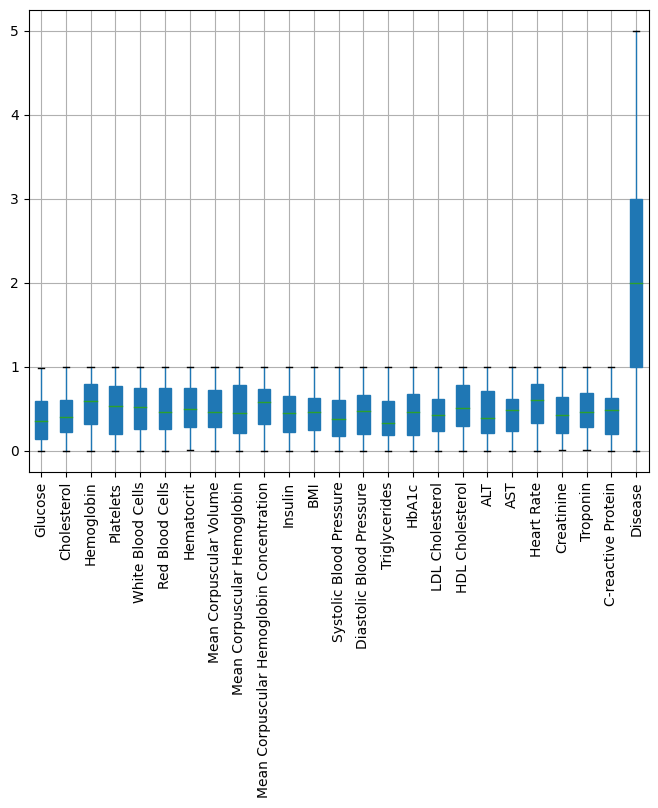

In [35]:
plt.figure(figsize=(8 , 6))
data.boxplot(patch_artist=True)
plt.xticks(rotation=90)
plt.show()

In [17]:
for i in data.columns:
    fig = px.box(data_frame=data, y=i, title=f'Box plot of {i}')
    fig.show()

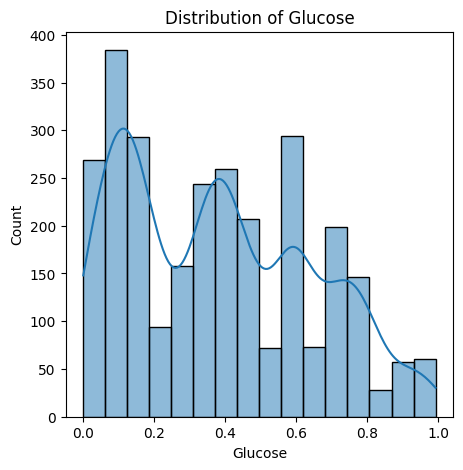

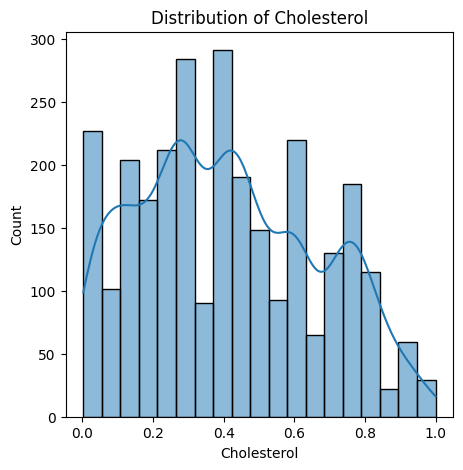

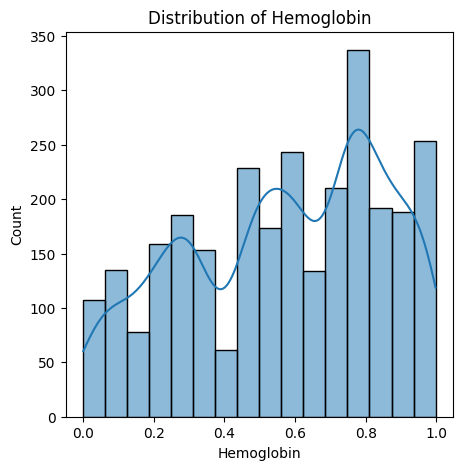

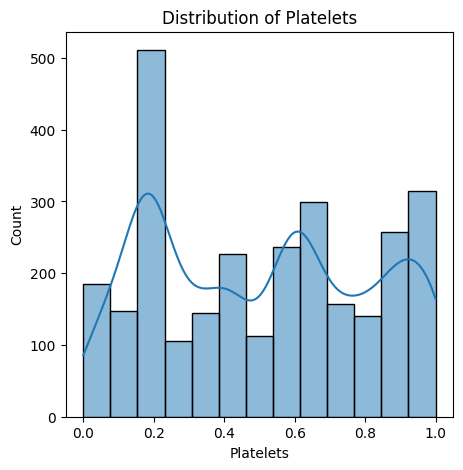

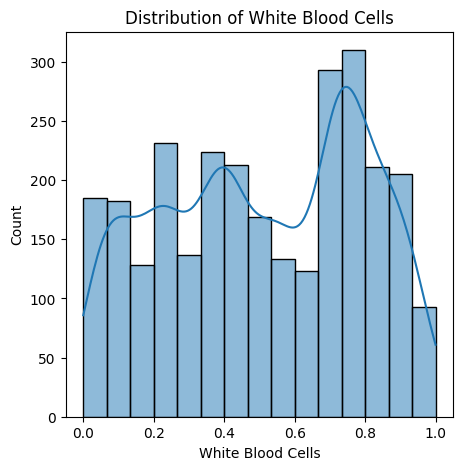

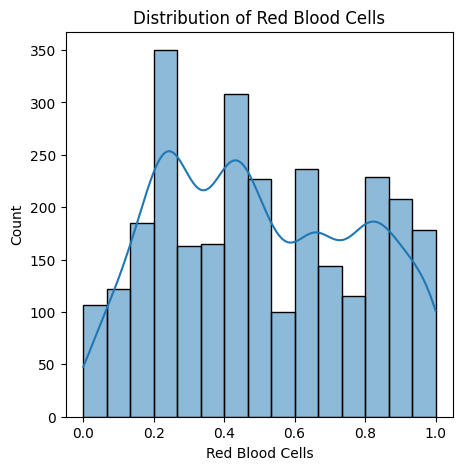

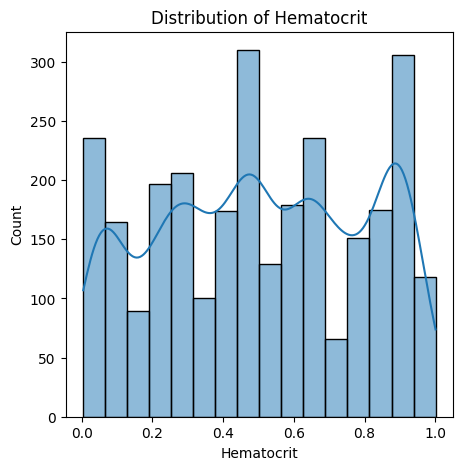

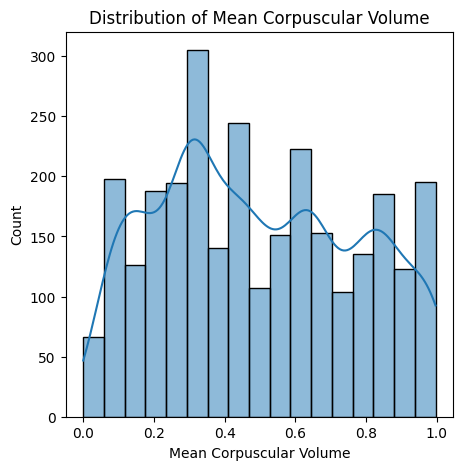

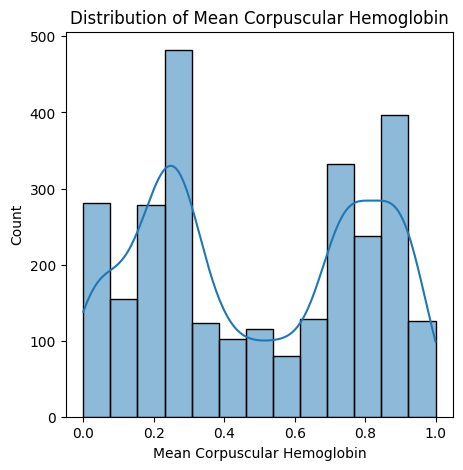

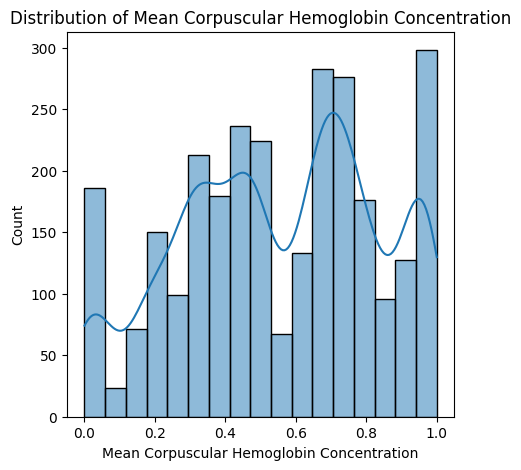

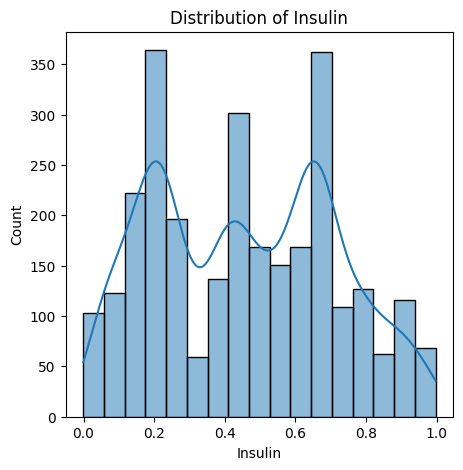

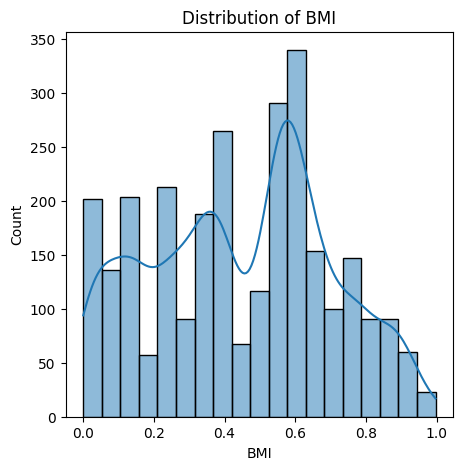

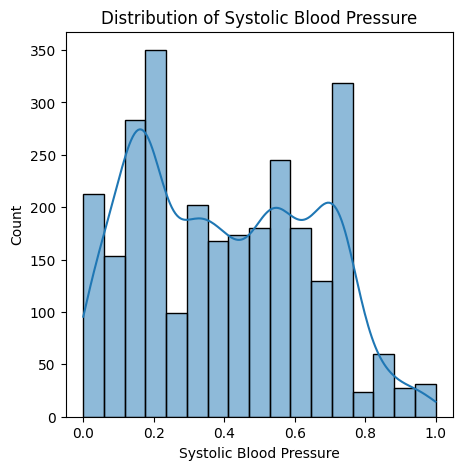

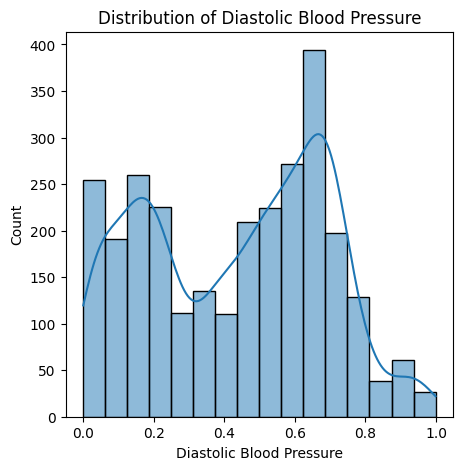

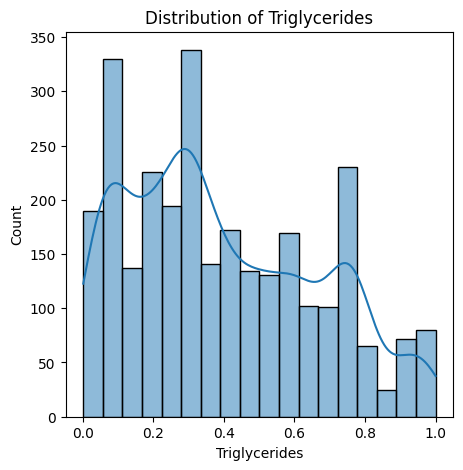

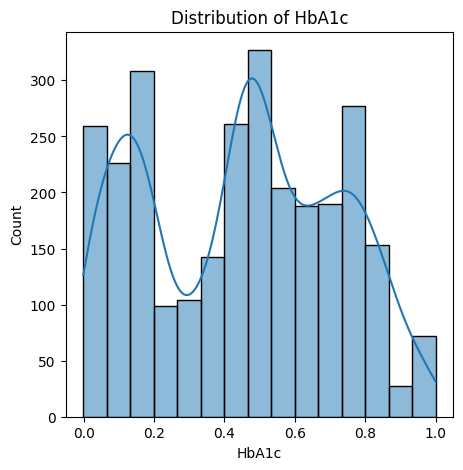

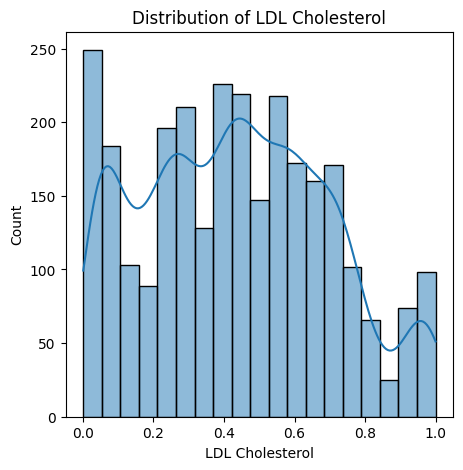

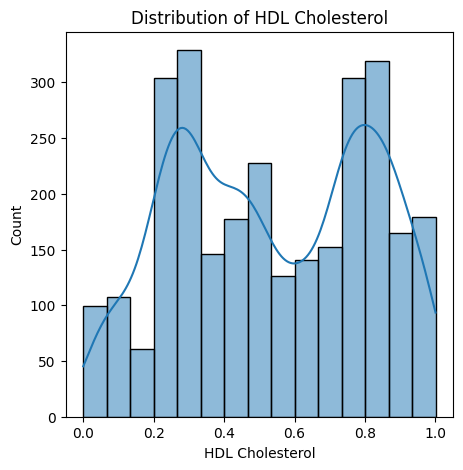

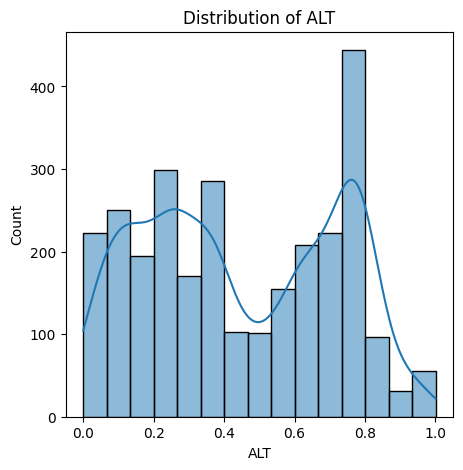

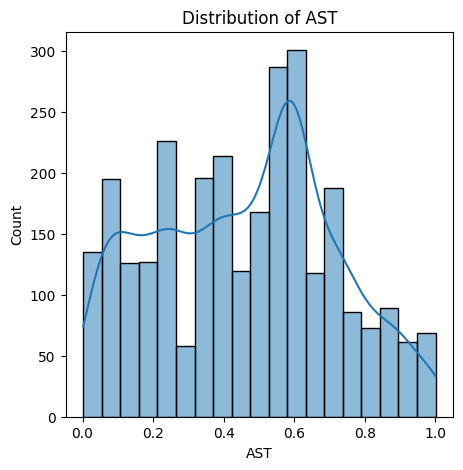

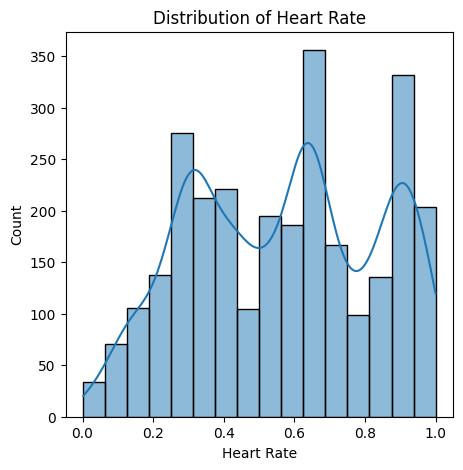

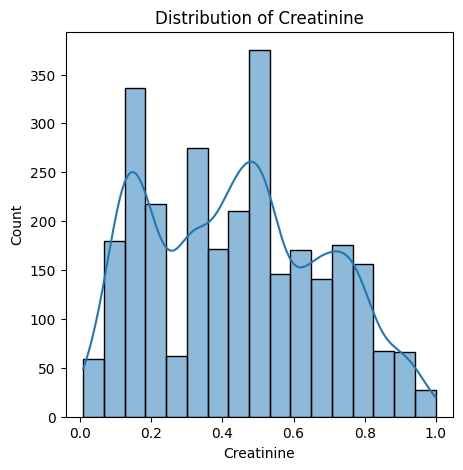

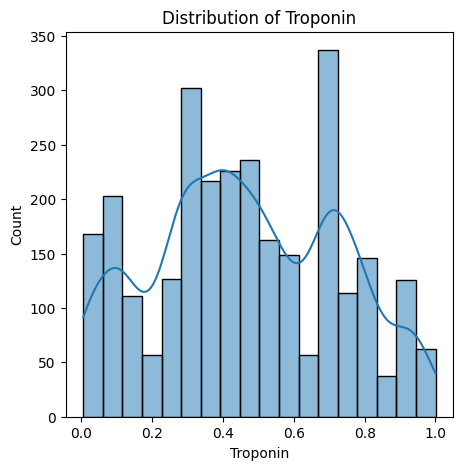

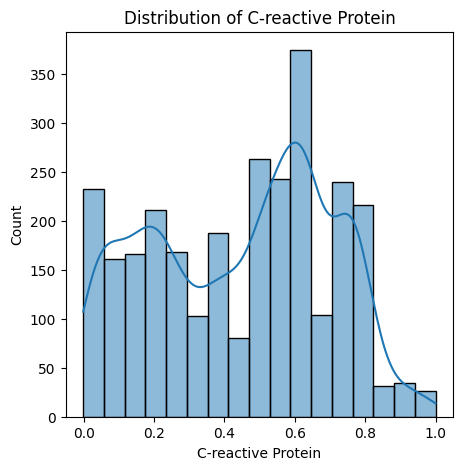

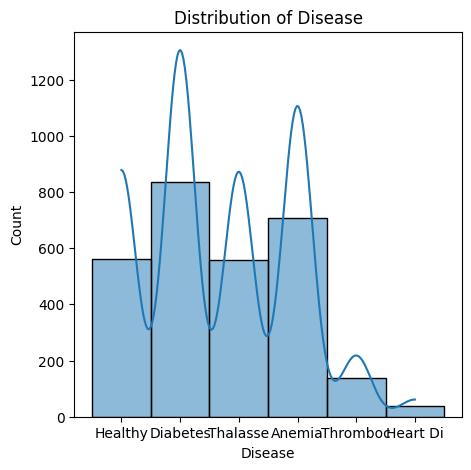

In [19]:
for i in (data.columns):
    plt.figure(figsize=(5, 5))
    sns.histplot(data = data , x = i ,kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

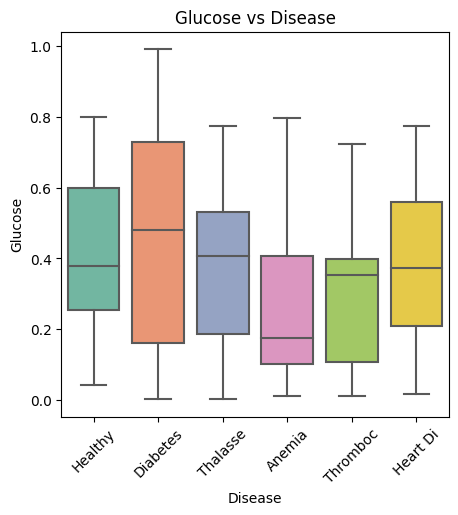

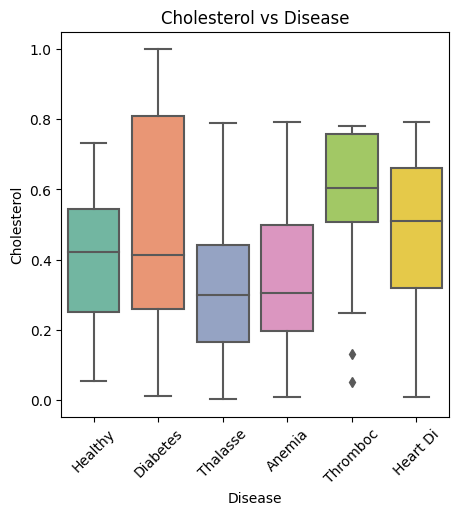

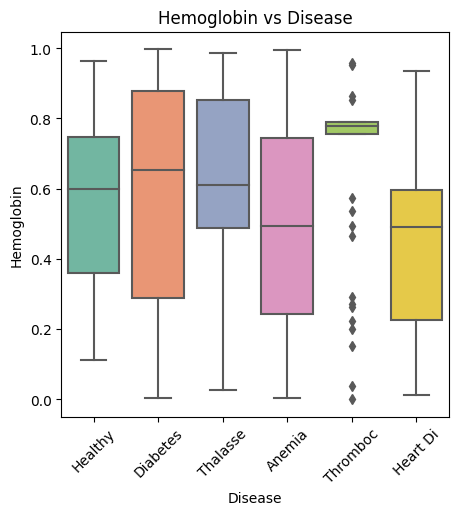

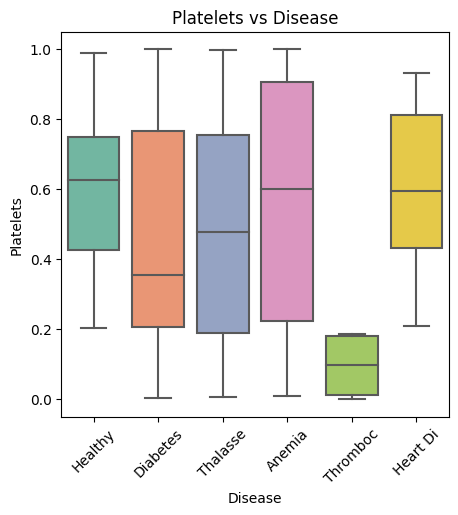

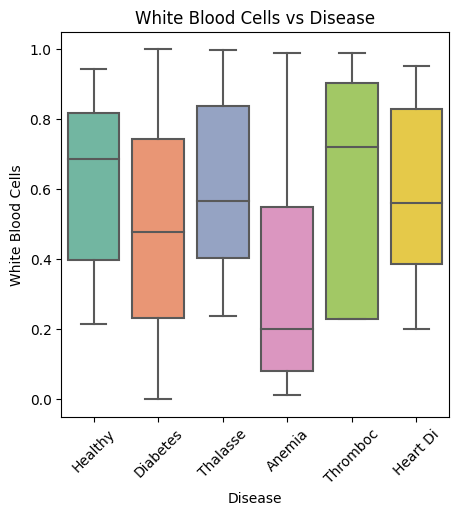

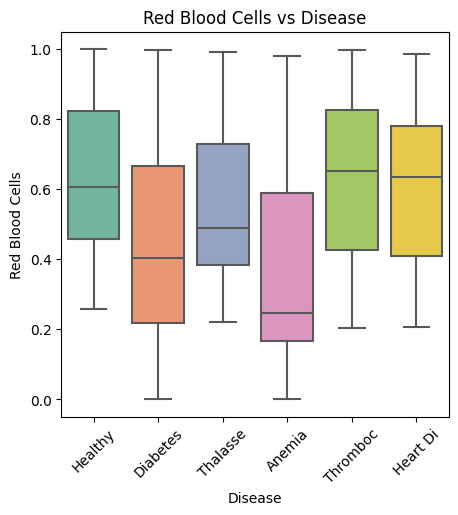

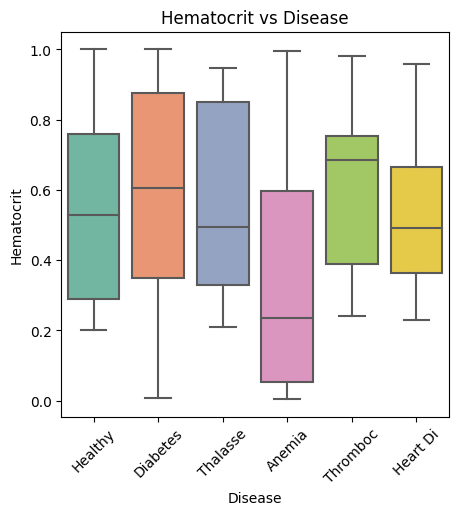

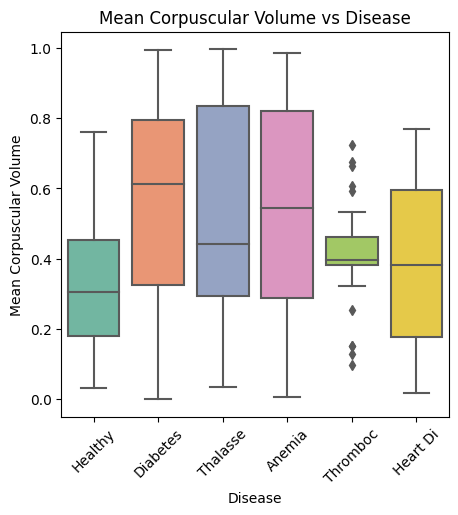

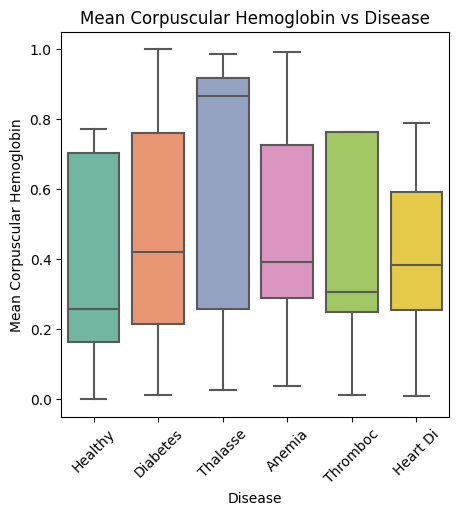

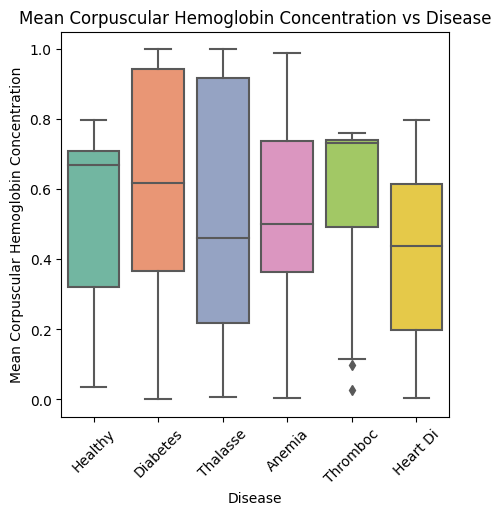

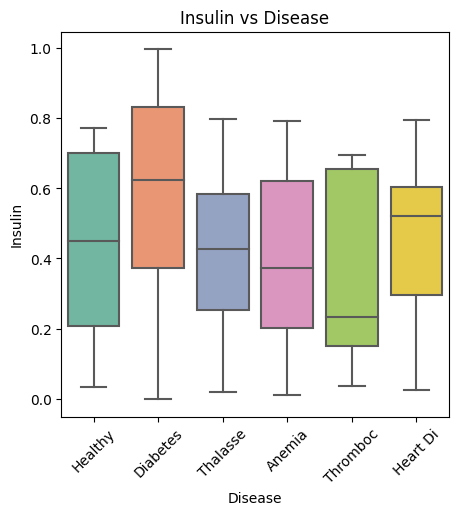

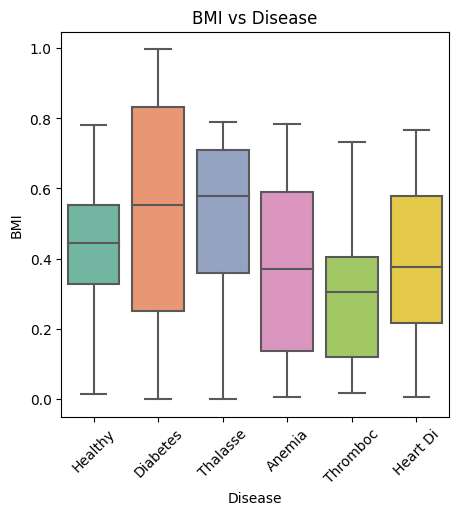

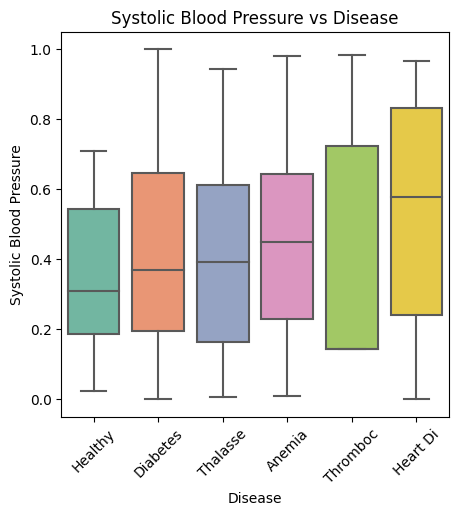

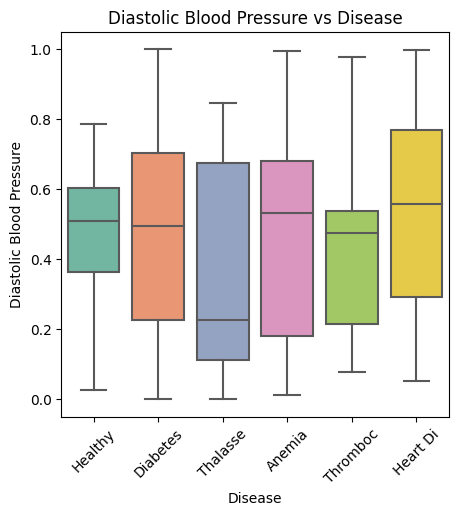

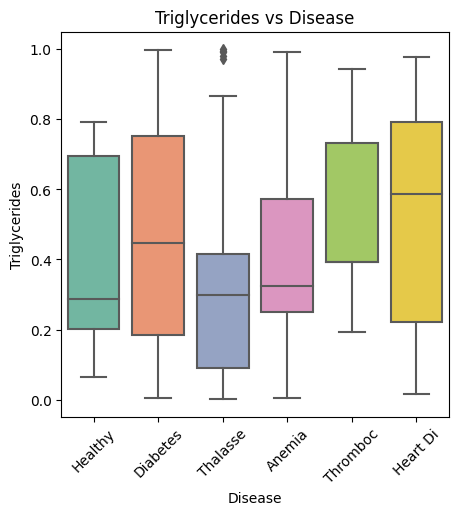

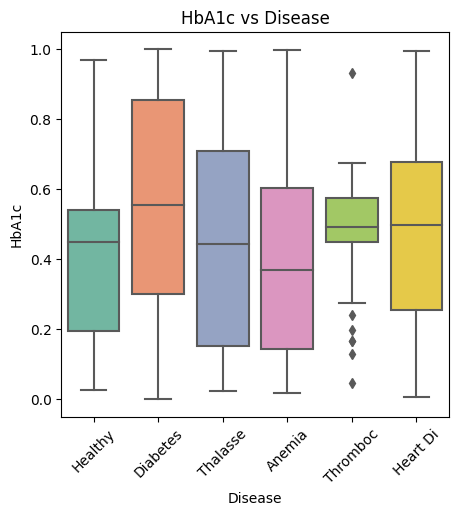

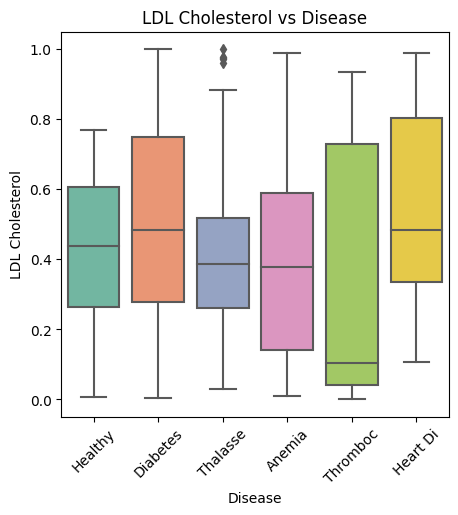

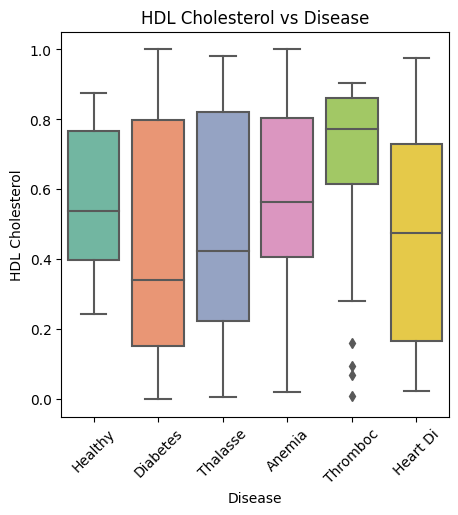

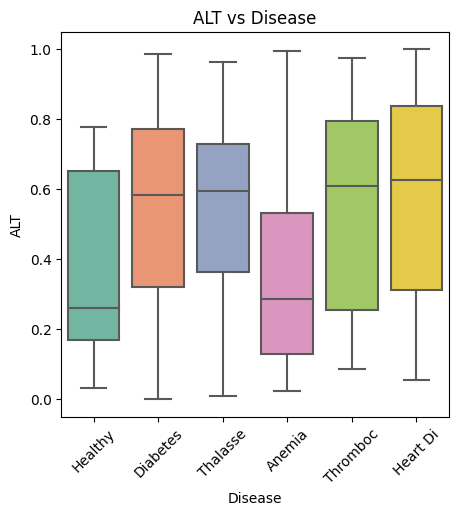

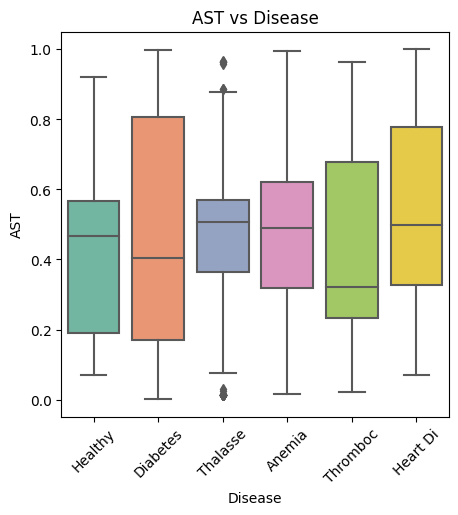

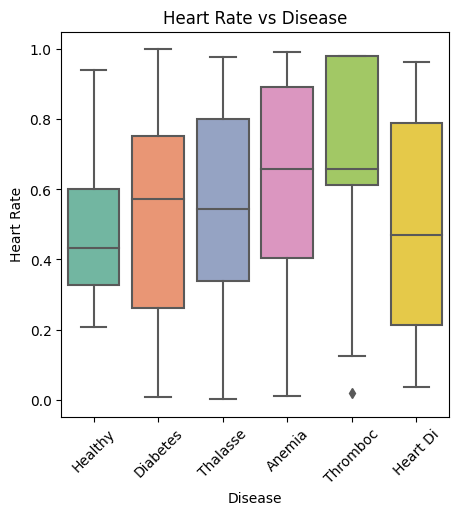

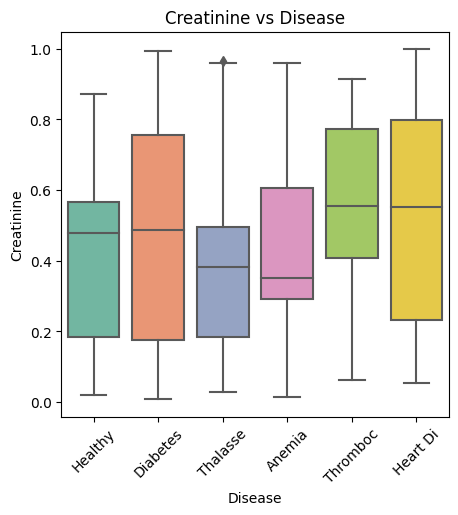

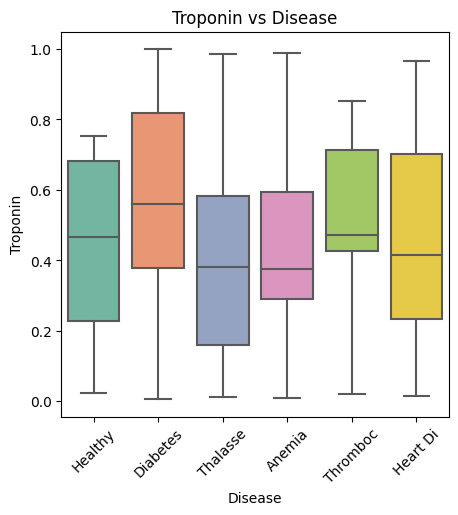

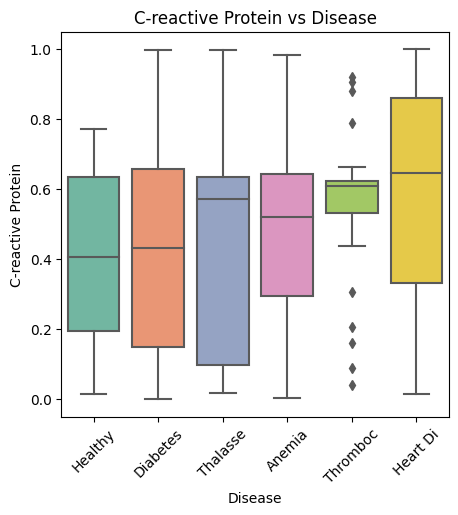

In [20]:
for i in (data.columns):
    if i != 'Disease':
        plt.figure(figsize=(5, 5))
        sns.boxplot(data = data , x = 'Disease' , y = i , palette='Set2')
        plt.title(f"{i} vs Disease")
        plt.xticks(rotation=45)
   
plt.show()

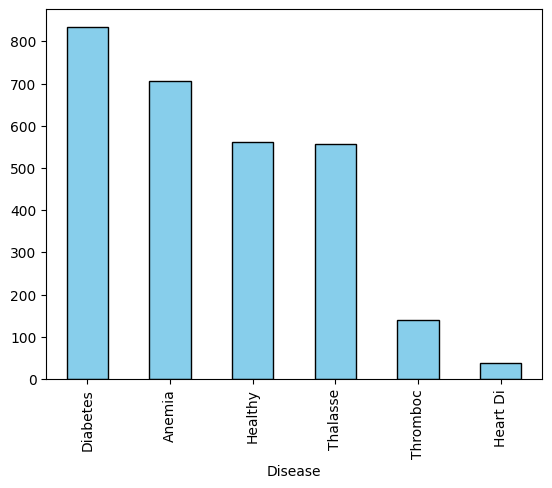

In [21]:
data['Disease'].value_counts().plot.bar(color='skyblue', edgecolor='black')
plt.show()

In [22]:
data['Disease'] = data['Disease'].replace({'Healthy':0, 'Diabetes':1, 'Thalasse':2, 'Anemia':3, 'Thromboc':4 , 'Heart Di':5}  )

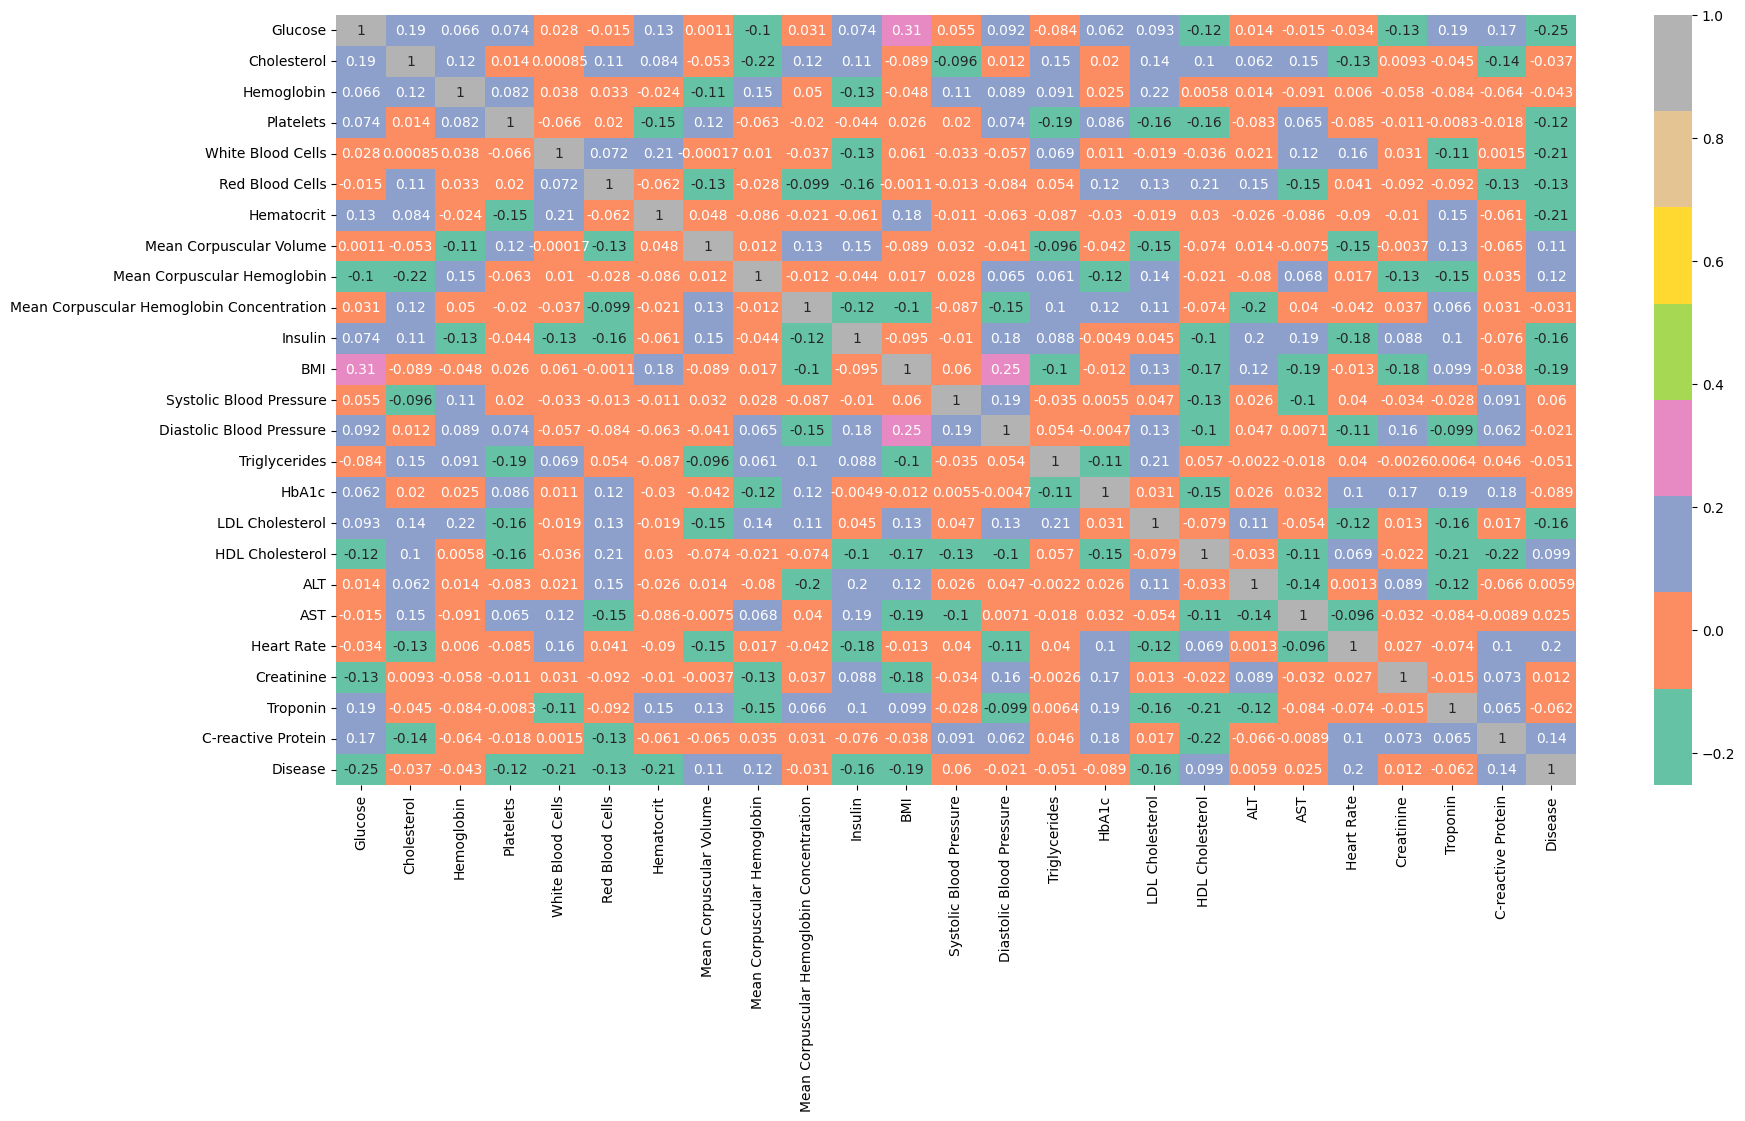

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True ,cmap='Set2')
plt.show()

In [24]:
data.corr()['Disease']

Glucose                                     -0.251505
Cholesterol                                 -0.037294
Hemoglobin                                  -0.043297
Platelets                                   -0.123275
White Blood Cells                           -0.209716
Red Blood Cells                             -0.132989
Hematocrit                                  -0.206512
Mean Corpuscular Volume                      0.114789
Mean Corpuscular Hemoglobin                  0.115551
Mean Corpuscular Hemoglobin Concentration   -0.030555
Insulin                                     -0.160222
BMI                                         -0.193022
Systolic Blood Pressure                      0.059745
Diastolic Blood Pressure                    -0.021358
Triglycerides                               -0.050922
HbA1c                                       -0.088900
LDL Cholesterol                             -0.155262
HDL Cholesterol                              0.099422
ALT                         

In [25]:
y = data['Disease']
X = data.drop(['Disease'] , axis = 1)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report

In [27]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.30 , random_state=42)

In [28]:
LRM = LogisticRegression()
RFM = RandomForestClassifier()
DTM = DecisionTreeClassifier()
SVCM = SVC()

In [29]:
models = [LRM , RFM , DTM , SVCM]

In [30]:
results = {}
for model in models:
    print(f'The Model is {model}')
    k_folds = KFold(n_splits=5, shuffle=True, random_state=42)
    
    scores = cross_val_score(model, X_train , y_train, cv=k_folds)
    
    print("K-Fold Cross-Validation Scores:", scores)
    
    mean_accuracy = np.mean(scores)
    results[model] = mean_accuracy
    print("Mean Accuracy:", mean_accuracy)
    print('-------------------------')
    

The Model is LogisticRegression()
K-Fold Cross-Validation Scores: [0.81108312 0.80856423 0.8186398  0.81612091 0.81108312]
Mean Accuracy: 0.8130982367758186
-------------------------
The Model is RandomForestClassifier()
K-Fold Cross-Validation Scores: [0.94206549 0.94458438 0.95969773 0.95465995 0.95214106]
Mean Accuracy: 0.9506297229219143
-------------------------
The Model is DecisionTreeClassifier()
K-Fold Cross-Validation Scores: [0.9395466  0.92191436 0.92947103 0.91183879 0.94962217]
Mean Accuracy: 0.930478589420655
-------------------------
The Model is SVC()
K-Fold Cross-Validation Scores: [0.94458438 0.93702771 0.95465995 0.94206549 0.94206549]
Mean Accuracy: 0.944080604534005
-------------------------


In [31]:
best_model = max(results, key=results.get)
print(f'The best model is {best_model} with a mean accuracy of {results[best_model]}')

best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

The best model is RandomForestClassifier() with a mean accuracy of 0.9506297229219143


In [32]:
accuracy_score(y_test , y_pred_best)

0.9518779342723005

In [33]:
confusion_matrix(y_test , y_pred_best)

array([[177,   0,   0,   0,   0,   0],
       [  0, 242,   0,   0,   0,   0],
       [  0,   8, 163,   0,   0,   1],
       [  0,  15,   0, 201,   0,   0],
       [  0,   5,   0,   0,  28,   0],
       [  0,  11,   1,   0,   0,   0]])

In [34]:
print(classification_report(y_test , y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       177
           1       0.86      1.00      0.93       242
           2       0.99      0.95      0.97       172
           3       1.00      0.93      0.96       216
           4       1.00      0.85      0.92        33
           5       0.00      0.00      0.00        12

    accuracy                           0.95       852
   macro avg       0.81      0.79      0.80       852
weighted avg       0.95      0.95      0.95       852

